# Problem Statement:

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

About the data: Let’s consider a Company dataset with around 10 variables and 400 records. The attributes are as follows:

 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not

# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix


import warnings 
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
company_data = pd.read_csv('Company_Data.csv')
company_data

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [3]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
company_data.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

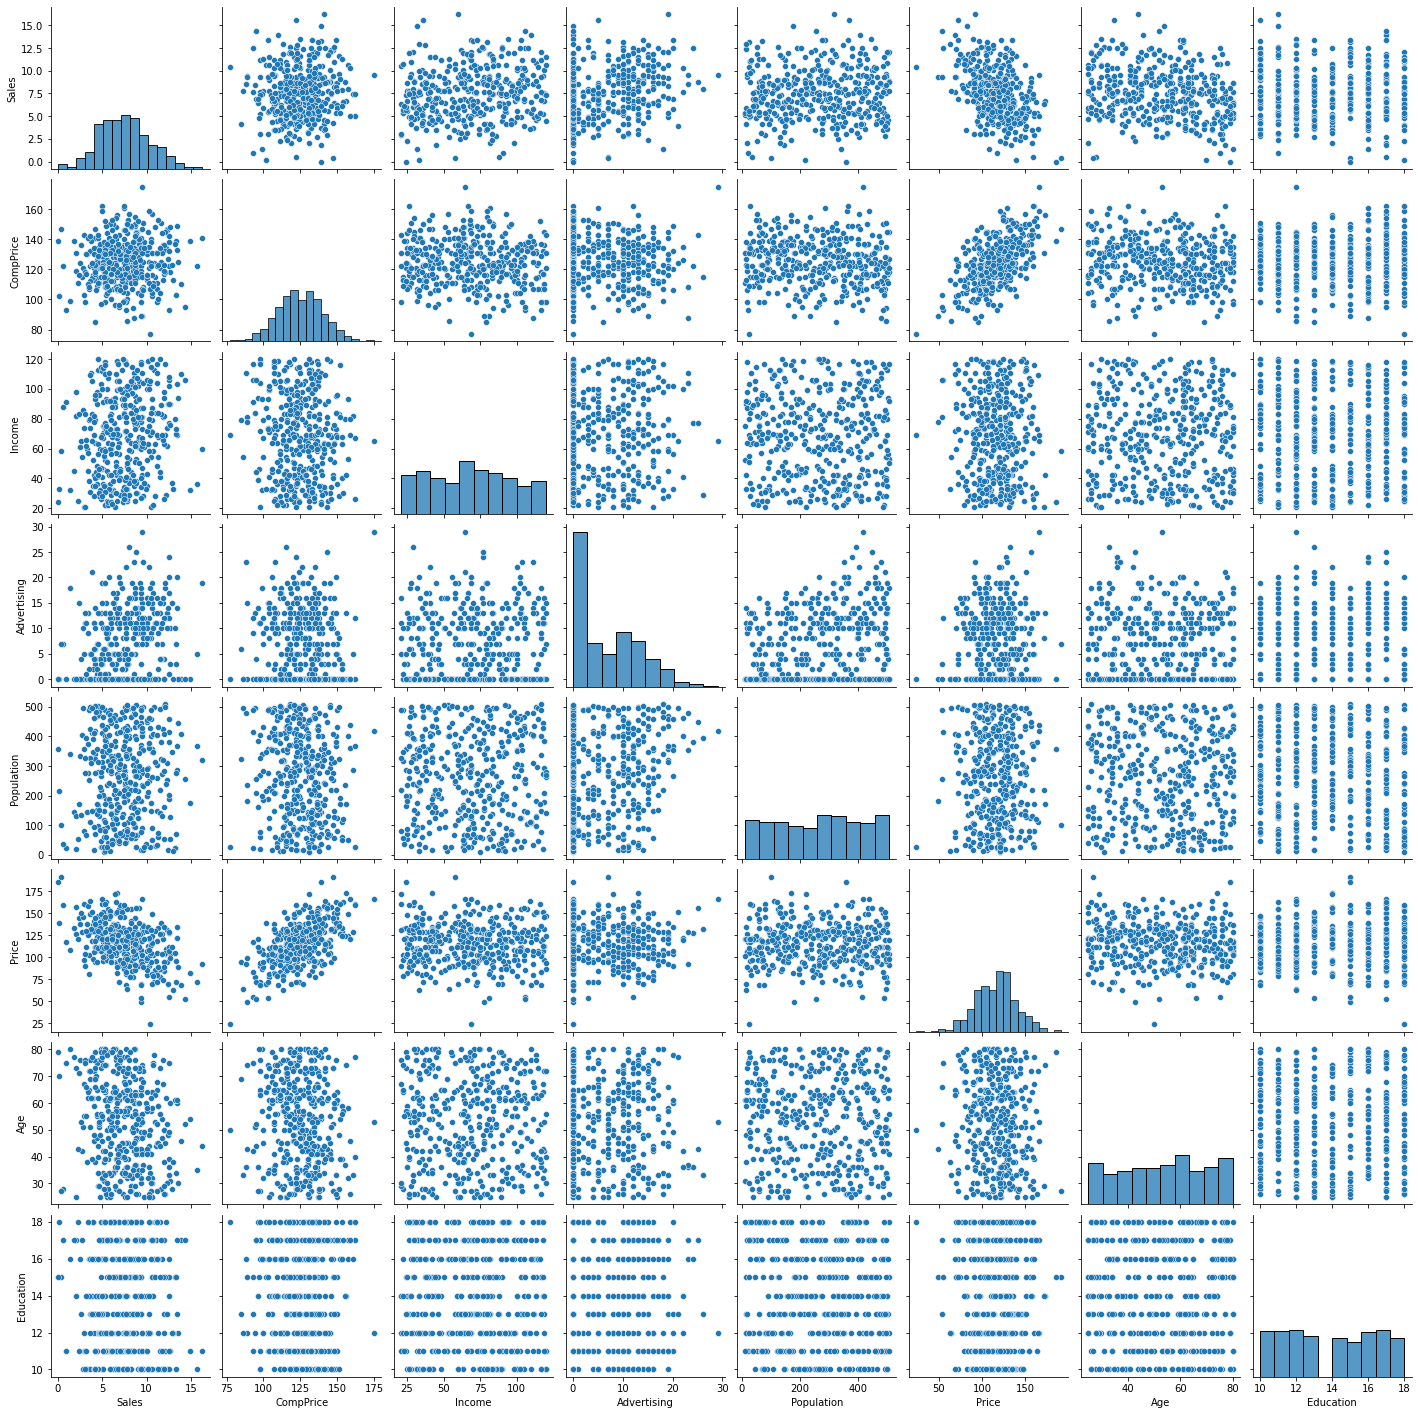

In [5]:
# pairplot
import seaborn as sns
sns.pairplot(company_data)

In [6]:
# Correlation analysis for company_data
corr = company_data.corr()
corr

Sales  CompPrice    Income  Advertising  Population     Price  \
Sales        1.000000   0.064079  0.151951     0.269507    0.050471 -0.444951   
CompPrice    0.064079   1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income       0.151951  -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  0.269507  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   0.050471  -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price       -0.444951   0.584848 -0.056698     0.044537   -0.012144  1.000000   
Age         -0.231815  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education   -0.051955   0.025197 -0.056855    -0.033594   -0.106378  0.011747   

                  Age  Education  
Sales       -0.231815  -0.051955  
CompPrice   -0.100239   0.025197  
Income      -0.004670  -0.056855  
Advertising -0.004557  -0.033594  
Population  -0.042663  -0.106378  
Price       -0.102177   0.011747  
Age          1.000000   0.006488  
Education    0.006488   1.000000

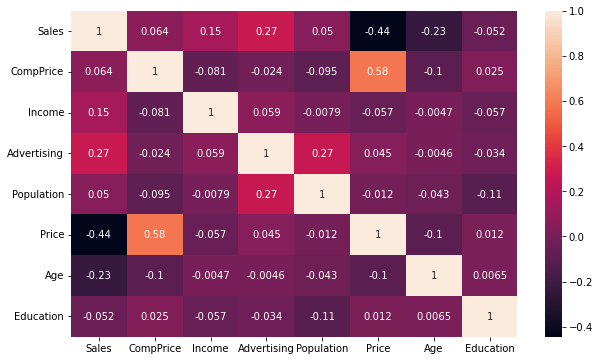

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)
plt.show()

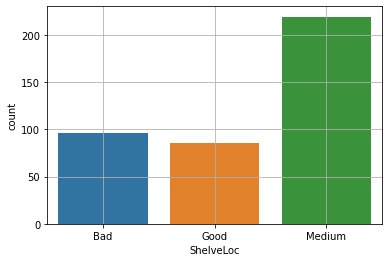

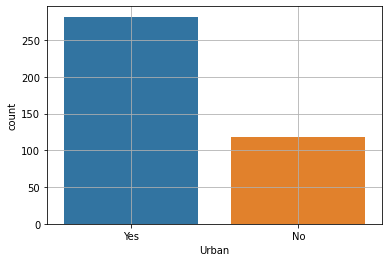

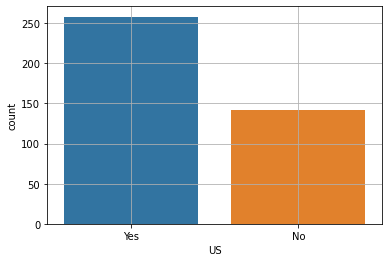

In [8]:
#count plot
sns.countplot(company_data['ShelveLoc'])
plt.grid(True)
plt.show()

sns.countplot(company_data['Urban'])
plt.grid(True)
plt.show()

sns.countplot(company_data['US'])
plt.grid(True)
plt.show()

In [9]:
#Converting Target variable 'Sales' into categories Low, Medium and High.
company_data['Sales'] = pd.cut(x=company_data['Sales'],bins=[0, 6, 12, 17], labels=['Low','Medium', 'High'], right = False)
company_data['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

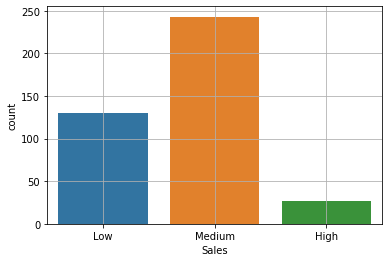

In [10]:
sns.countplot(company_data['Sales'])
plt.grid(True)
plt.show()


In [11]:
company_data['Sales'].value_counts()

Medium    243
Low       130
High       27
Name: Sales, dtype: int64

In [12]:
company_data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0  Medium        138      73           11         276    120       Bad   42   
1  Medium        111      48           16         260     83      Good   65   
2  Medium        113      35           10         269     80    Medium   59   
3  Medium        117     100            4         466     97    Medium   55   
4     Low        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [14]:
#encoding categorical company_data
label_encoder = preprocessing.LabelEncoder()

company_data['Sales'] = label_encoder.fit_transform(company_data['Sales'])
company_data['ShelveLoc'] = label_encoder.fit_transform(company_data['ShelveLoc'])
company_data['Urban'] = label_encoder.fit_transform(company_data['Urban'])
company_data['US'] = label_encoder.fit_transform(company_data['US'])

company_data


Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        2        138      73           11         276    120          0   42   
1        2        111      48           16         260     83          1   65   
2        2        113      35           10         269     80          2   59   
3        2        117     100            4         466     97          2   55   
4        1        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395      0        138     108           17         203    128          1   33   
396      2        139      23            3          37    120          2   55   
397      2        162      26           12         368    159          2   40   
398      1        100      79            7         284     95          0   50   
399      2        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
395         14      1   1  
396         11      0   1  
397         18      1   1  
398         12      1   1  
399         16      1   1  

[400 rows x 11 columns]

In [15]:
# Input and Output variables
X = company_data.drop('Sales', axis = 1)
y = company_data[['Sales']]

In [20]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 42)

In [17]:
print('x_train_shape :',x_train.shape ,'\n y_train_shape :',y_train.shape)

x_train_shape : (268, 10) 
 y_train_shape : (268, 1)


In [18]:
print('x_test_shape :',x_test.shape ,'\n y_test_shape :',y_test.shape)

x_test_shape : (132, 10) 
 y_test_shape : (132, 1)


# Building model

In [19]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

# Grid SearchCv
To check which criterion is best for our RandomForest Classifier and also which Max_depth is best for our RandomForest Classifier.

In [21]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = rf_model,
                           param_grid = {'criterion':['entropy','gini'],
                                         'max_depth':[2,3,4,5,6,7,8,9,10]},
                           cv=5)
grid_search.fit(X,y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 10}
0.7425


we can take ,criterion: 'gini' & max_depth: 10 to get best fitted model.

# New Mode

In [22]:
rf_best_model = RandomForestClassifier(criterion = 'gini',random_state=42,max_depth=10)
rf_best_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [23]:
#prediction train data
pred_train_y = rf_best_model.predict(x_train)

In [24]:
# Predicting company_data by gini 
pred_test_y = rf_best_model.predict(x_test)
pred_test_y

array([1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2],
      dtype=int64)

In [25]:
pd.Series(pred_test_y).value_counts()

2    99
1    33
dtype: int64

In [26]:
accuracy_score(y_train,pred_train_y)  

0.996268656716418

In [27]:
confusion_matrix(y_train,pred_train_y)

array([[ 14,   0,   0],
       [  0,  94,   1],
       [  0,   0, 159]], dtype=int64)

In [28]:
print('Classification Report:\n',classification_report(y_train,pred_train_y))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.99      0.99        95
           2       0.99      1.00      1.00       159

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



In [29]:
# Checking accuracy of model
accuracy_score(y_test,pred_test_y)

0.696969696969697

In [30]:
confusion_matrix(y_test,pred_test_y)

array([[ 0,  1, 12],
       [ 0, 20, 15],
       [ 0, 12, 72]], dtype=int64)

In [31]:
print('Classification Report:\n',classification_report(y_test,pred_test_y))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.61      0.57      0.59        35
           2       0.73      0.86      0.79        84

    accuracy                           0.70       132
   macro avg       0.44      0.48      0.46       132
weighted avg       0.62      0.70      0.66       132

